In [ ]:
!pip install facenet-pytorch Pillow ultralytics


In [ ]:
from facenet_pytorch import MTCNN
from PIL import Image
import torch
from ultralytics import YOLO
import cv2
import numpy as np


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import files
uploaded = files.upload()

# Get the uploaded file name
uploaded_image_path = list(uploaded.keys())[0]

# Load the image using PIL
img = Image.open(uploaded_image_path)

Saving photo_2024-01-23_19-35-03 (2).jpg to photo_2024-01-23_19-35-03 (2).jpg


In [ ]:
img.show()


In [ ]:
# Initialize MTCNN
device = 'cuda' if torch.cuda.is_available() else 'cpu'
mtcnn = MTCNN(keep_all=True, device=device)

# Detect faces in the image
boxes, _ = mtcnn.detect(img)

# Convert image to OpenCV format
opencv_img = np.array(img)[:, :, ::-1].copy()

# Draw bounding boxes on the image (for visualization)
if boxes is not None:
    for box in boxes:
        cv2.rectangle(opencv_img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
    print(f"Found {len(boxes)} face(s) in the image.")
else:
    print("No faces detected.")


Found 3 face(s) in the image.


In [ ]:
# Perform object detection using YOLO
results = model(opencv_img)

# Visualize the detected objects by drawing bounding boxes
for result in results:
    # Each result is a tuple containing the detection data
    boxes = result.boxes  # Get the boxes from the result
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # Access the bounding box coordinates
        conf = box.conf[0]  # Access the confidence score
        cls = box.cls[0]  # Access the class label
        cv2.rectangle(opencv_img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        print(f"Detected {model.names[int(cls)]} with confidence {conf:.2f}.")


0: 640x480 2 persons, 461.1ms
Speed: 13.9ms preprocess, 461.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Detected person with confidence 0.93.
Detected person with confidence 0.36.


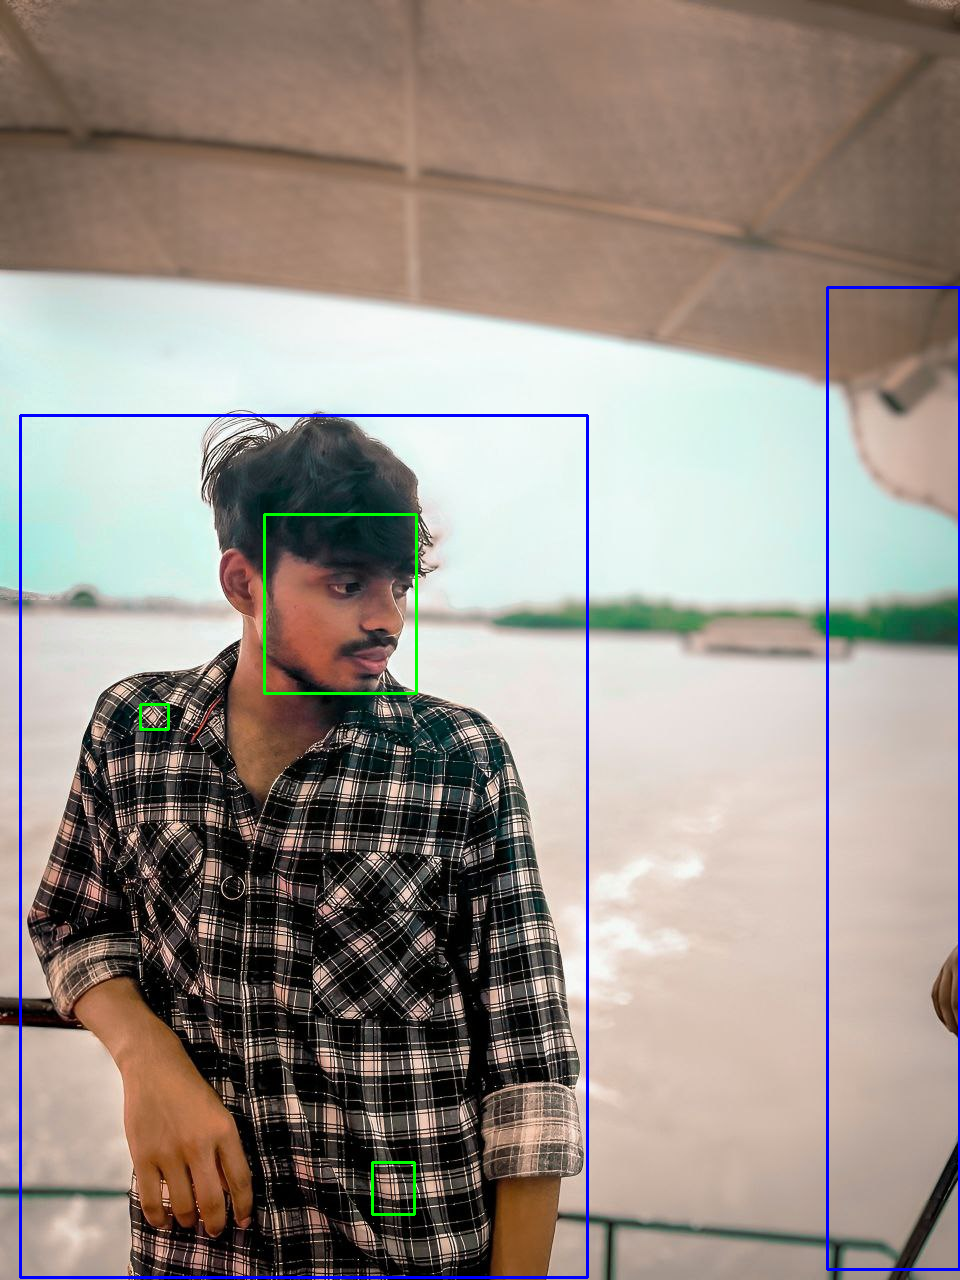

In [ ]:
# Import the necessary library from google.colab.patches
from google.colab.patches import cv2_imshow

# Replace cv2.imshow with cv2_imshow
cv2_imshow(opencv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import os

# Check if the directory exists
if os.path.exists('/mnt/data/'):
    # List files in the /mnt/data/ directory
    print(os.listdir('/mnt/data/'))
else:
    print("Error: The directory '/mnt/data/' does not exist.")
    # Here you can handle the error, such as creating the directory,
    # exiting the script, or using a default image path.

Error: The directory '/mnt/data/' does not exist.


In [ ]:
from google.colab import files

# Upload an image file
uploaded = files.upload()  # This will open a file picker


Saving photo_2024-01-23_19-35-03 (2).jpg to photo_2024-01-23_19-35-03 (2) (1).jpg


In [ ]:
!pip install -q ultralytics


Saving photo_2024-01-23_19-35-03 (2).jpg to photo_2024-01-23_19-35-03 (2) (2).jpg

0: 640x480 1 person, 191.7ms
Speed: 5.6ms preprocess, 191.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


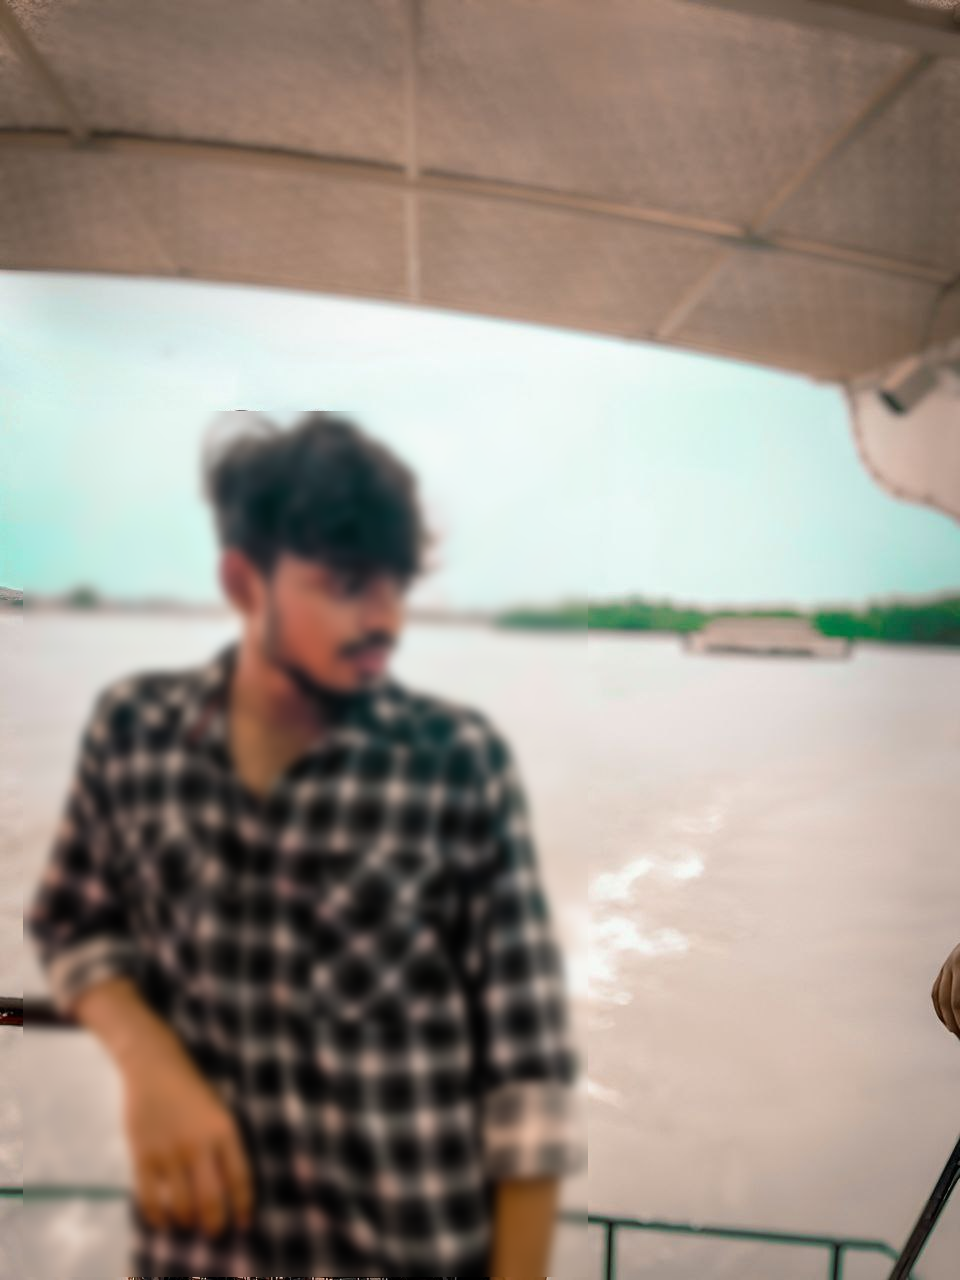

In [ ]:
# Step 1: Upload the image file
from google.colab import files

uploaded = files.upload()  # Upload the image file
image_filename = list(uploaded.keys())[0]  # Get the uploaded filename

# Step 2: Install ultralytics
!pip install -q ultralytics

import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO  # Import YOLO directly from ultralytics

# Step 3: Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Load the model directly

# Step 4: Load the uploaded image
opencv_img = cv2.imread(image_filename)

# Check if the image has been loaded
if opencv_img is None:
    raise ValueError(f"Could not load image from {image_filename}")

# Convert the image from BGR to RGB (YOLO expects RGB images)
rgb_img = cv2.cvtColor(opencv_img, cv2.COLOR_BGR2RGB)

# Step 5: Run detection
results = model(rgb_img)

# Step 6: Iterate through the results and blur detected faces
for result in results:  # Iterate over each result in the results list
    boxes = result.boxes  # Access the boxes from the result

    boxes_array = boxes.xyxy.cpu().numpy() if boxes.xyxy.is_cuda else boxes.xyxy.numpy()
    conf = boxes.conf.cpu().numpy() if boxes.conf.is_cuda else boxes.conf.numpy()
    cls = boxes.cls.cpu().numpy() if boxes.cls.is_cuda else boxes.cls.numpy()

    for i, box in enumerate(boxes_array):  # Iterate over each bounding box
        x1, y1, x2, y2 = map(int, box)  # Unpack bounding box coordinates

        # Extract the face region
        face_region = opencv_img[y1:y2, x1:x2]

        # Apply Gaussian blur to the face region
        blurred_face = cv2.GaussianBlur(face_region, (35, 35), 0)

        # Replace the original face region with the blurred one
        opencv_img[y1:y2, x1:x2] = blurred_face

# Step 7: Display the image with blurred faces
cv2_imshow(opencv_img)
